# Speech Emotion Recognition {SER}

## **Problem Statement**:


-------

### Overview:

The objective of this project is to build a Speech Emotion Recognition (SER) system that can classify emotions from speech signals using the Toronto Emotional Speech Set (TESS) dataset. The system will utilize machine learning and deep learning algorithms to analyze speech samples and automatically detect the emotion being expressed. This can significantly enhance real-world applications such as virtual assistants, sentiment analysis in customer service, and emotion-based user experience personalization.

The TESS dataset, which contains speech samples recorded from two female actors across seven emotional categories (angry, disgust, fear, happy, neutral, pleasant surprise, and sad), will be used for training and evaluating the model. Each actor reads the same set of 200 target words, offering a rich corpus of emotional speech for analysis.

### Data Collection:

The dataset consists of:
* Speech samples: A collection of audio files where each file represents a word spoken with a specific emotion.
* Emotion labels: The corresponding emotional categories assigned to each audio file.

##### *Dataset Link:* [TESS (Toronto Emotional Speech Set)](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess/data)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

### Loading Data

In [2]:
# downloading dataset from kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 419M/428M [00:02<00:00, 170MB/s]
100% 428M/428M [00:02<00:00, 183MB/s]


In [3]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d /content/tessdata/

Streaming output truncated to the last 5000 lines.
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/tessdata/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/tessdata/TESS Toront

In [4]:
!mv '/content/tessdata/TESS Toronto emotional speech set data/YAF_pleasant_surprised' '/content/tessdata/TESS Toronto emotional speech set data/surprise'

In [5]:
dir_path = '/content/tessdata/TESS Toronto emotional speech set data'
lst = os.listdir(dir_path)
lst

['YAF_sad',
 'YAF_angry',
 'OAF_Fear',
 'YAF_fear',
 'OAF_neutral',
 'OAF_angry',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_disgust',
 'surprise',
 'YAF_happy',
 'OAF_Sad',
 'YAF_disgust',
 'OAF_happy']

In [6]:
def load_data(dir_path):
  path, labels = [], []
  for label in os.listdir(dir_path):
    for file in os.listdir(os.path.join(dir_path, label)):
      path.append(os.path.join(dir_path, label, file))
      labels.append(label.split('_')[-1].lower())
  return path, labels

In [7]:
path, labels = load_data(dir_path)
print(set(labels))

{'neutral', 'sad', 'angry', 'disgust', 'happy', 'fear', 'surprise'}


In [8]:
df = pd.DataFrame()
df['path'] = path
df['label'] = labels
df.sample(5)

,path,label
839,/content/tessdata/TESS Toronto emotional speec...,neutral
2031,/content/tessdata/TESS Toronto emotional speec...,happy
872,/content/tessdata/TESS Toronto emotional speec...,neutral
2217,/content/tessdata/TESS Toronto emotional speec...,sad
1838,/content/tessdata/TESS Toronto emotional speec...,surprise


In [9]:
df['label'].value_counts()

,count
label,
sad,400
angry,400
fear,400
neutral,400
surprise,400
disgust,400
happy,400


In [10]:
# number of output labels
n_labels = len(df['label'].unique())
n_labels

7

### Data Analysis

<Axes: ylabel='count'>

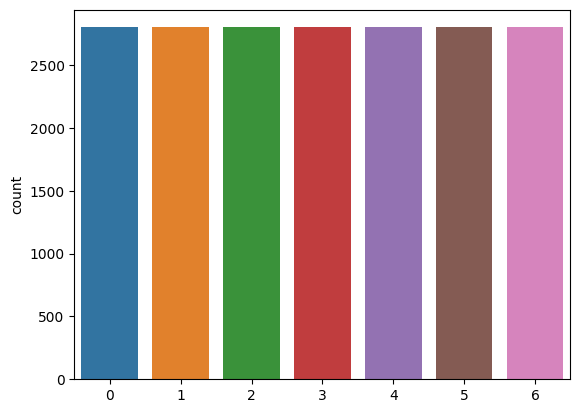

In [11]:
# encoding output labels
le = LabelEncoder()
labels_encoded = to_categorical(le.fit_transform(labels))
sns.countplot(data=labels_encoded)

In [12]:
labels_encoded.shape

(2800, 7)

In [13]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10, 4))
  plt.title(emotion + " waveplot", size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion + " spectogram",size=20 )
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

In [14]:
emotion='fear'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

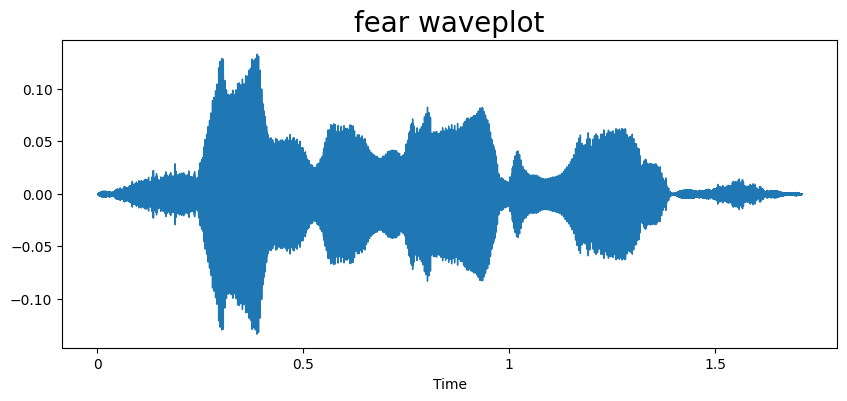

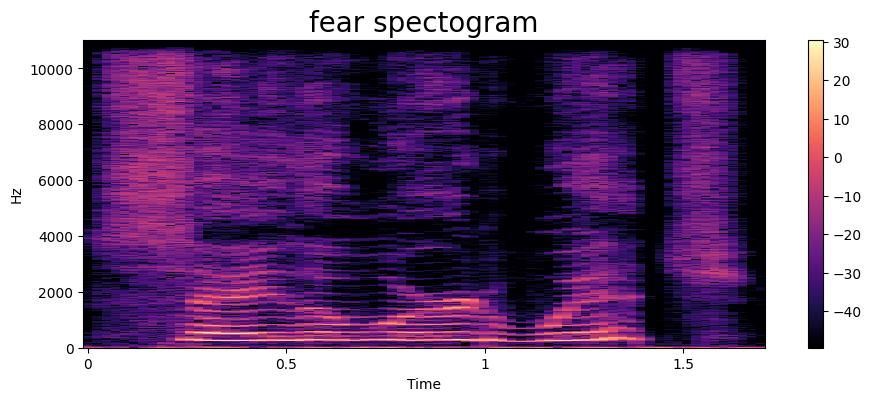

In [15]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

In [16]:
emotion='sad'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

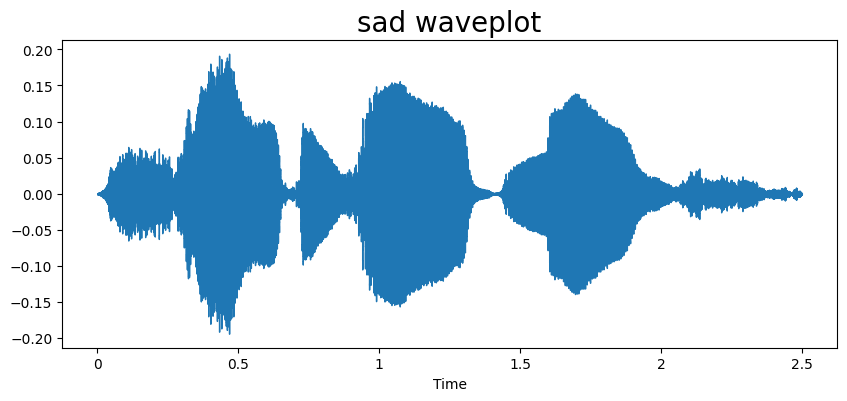

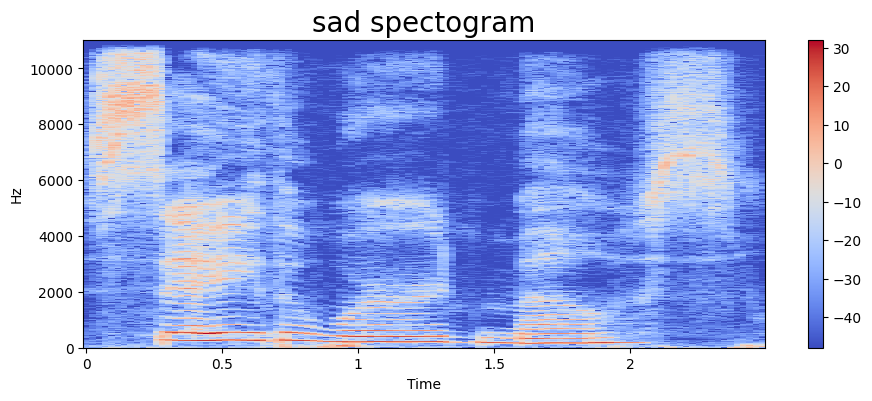

In [17]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

In [18]:
emotion='surprise'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

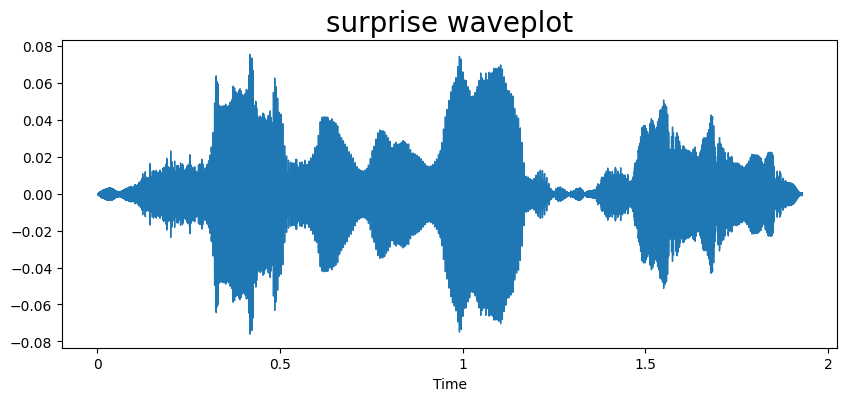

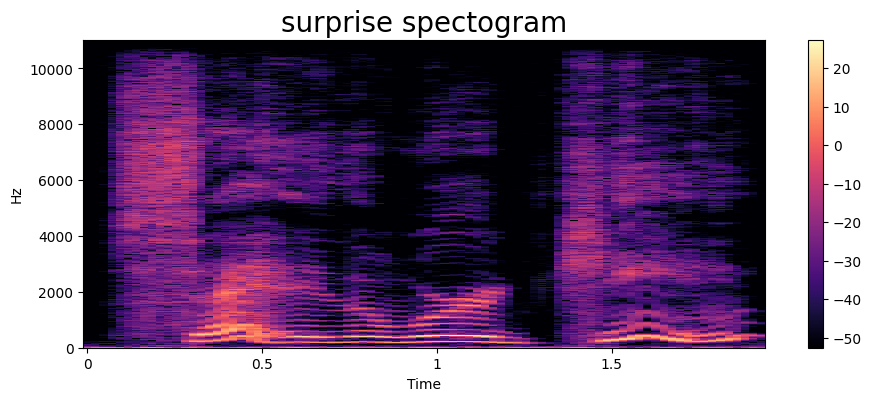

In [19]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

In [20]:
emotion='happy'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

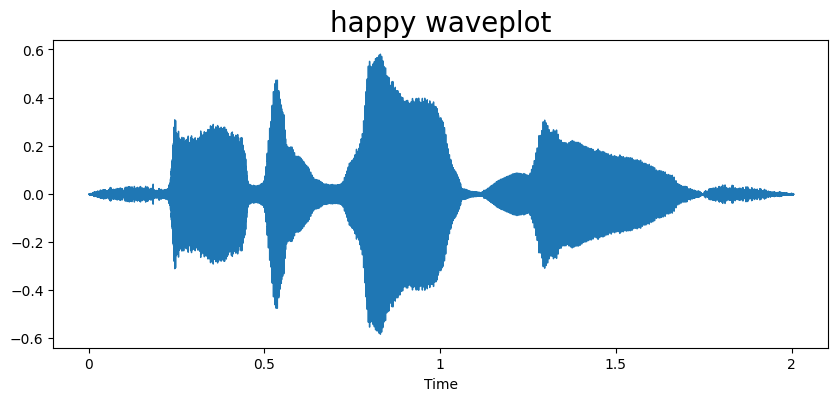

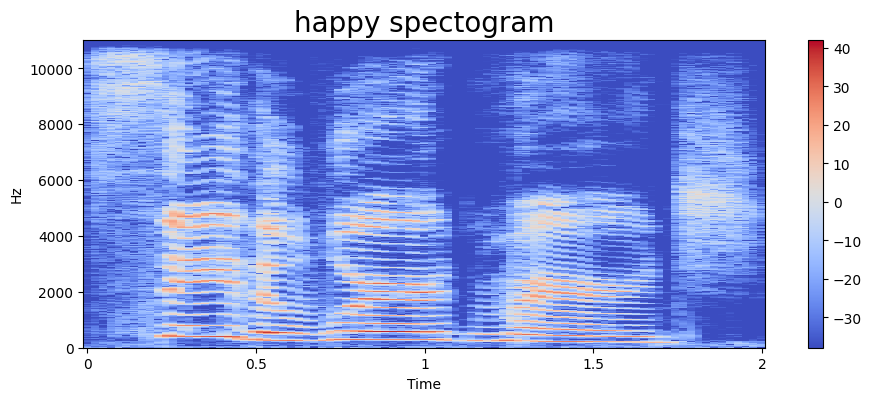

In [21]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

In [22]:
emotion='angry'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

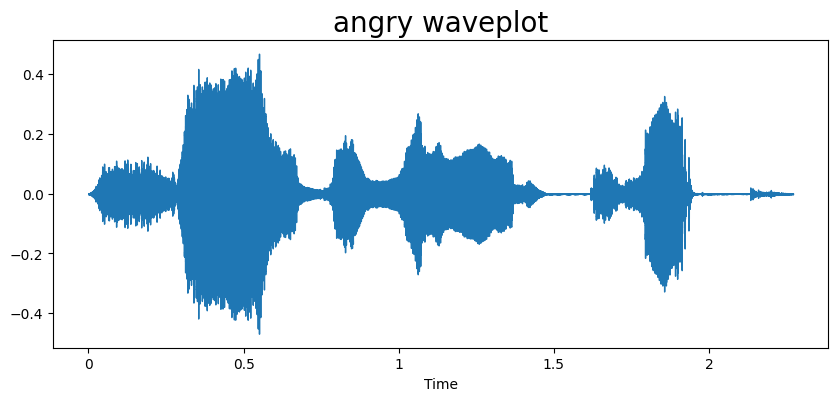

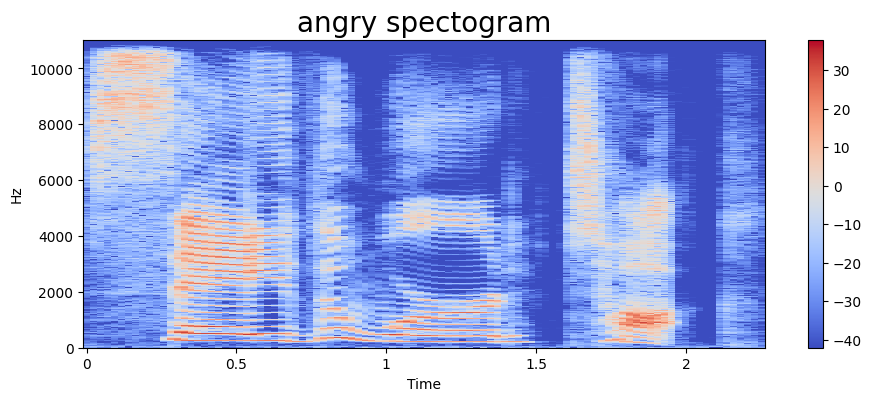

In [23]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

In [24]:
emotion='disgust'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

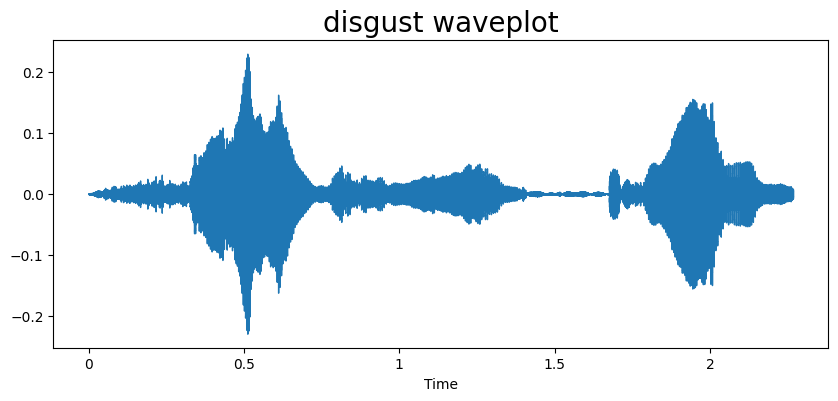

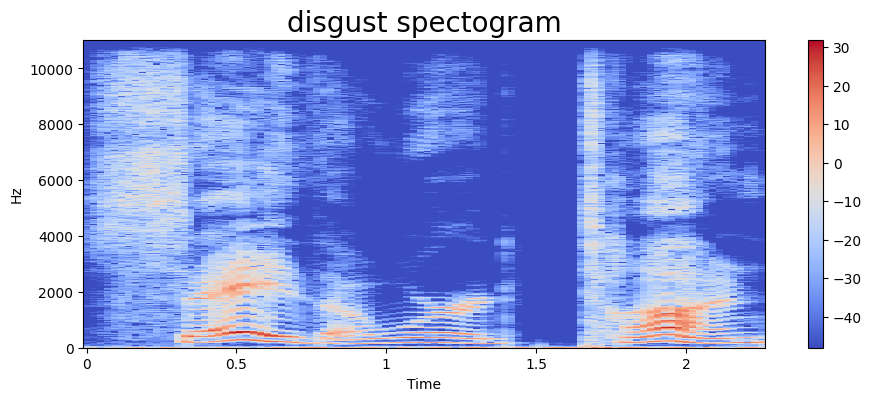

In [25]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

In [26]:
emotion='neutral'
file_path=np.array(df['path'][df['label']==emotion])[0]
Audio(file_path)

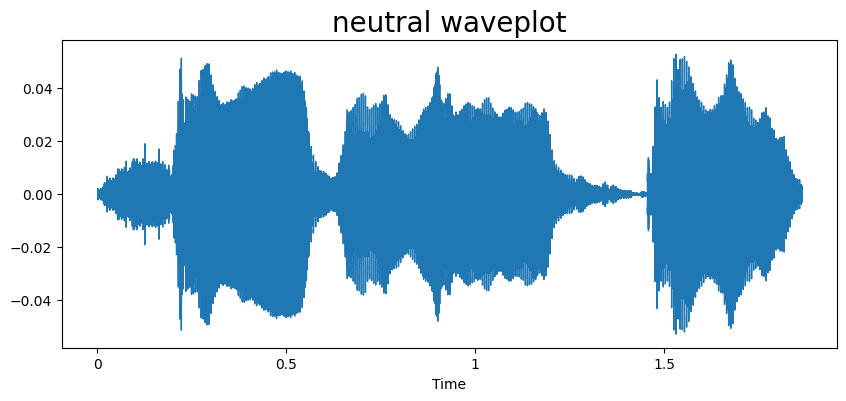

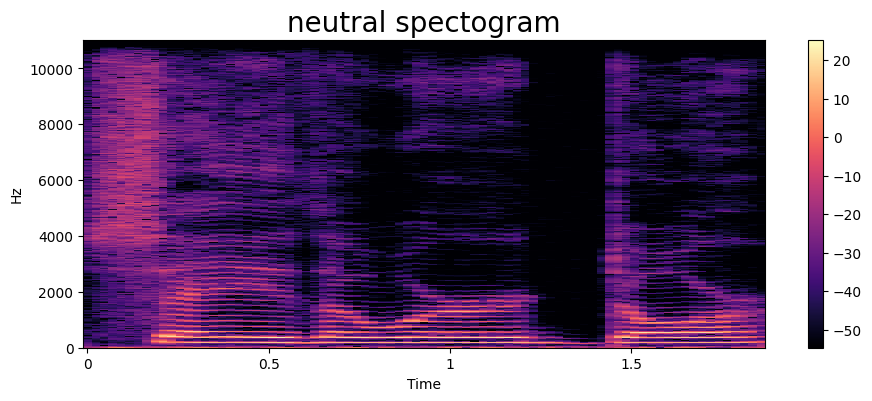

In [27]:
signal, sr = librosa.load(file_path)
waveplot(signal, sr, emotion)
spectogram(signal, sr, emotion)

### Feature Extraction

In [28]:
# Mel Frequency Ceptral Coefficient extraction
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

    return mfcc

In [29]:
X_mfcc=df['path'].apply(lambda x: extract_mfcc(x))

In [30]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [31]:
X=np.expand_dims(X,-1)
print(X.dtype)
X.shape

float32


(2800, 40, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, labels_encoded, test_size=0.2, random_state=42)

In [33]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

## Model Building

In [34]:
# Model Architecture
model = Sequential()
model.add(LSTM(150, input_shape = (40, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150)                 │          91,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,107 (457.45 KB)

 Trainable params: 117,107 (457.45 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.2)
model.save('speech_recog_model.keras')

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4210 - loss: 1.4804 - val_accuracy: 0.7812 - val_loss: 0.5182
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8087 - loss: 0.5728 - val_accuracy: 0.8147 - val_loss: 0.4501
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8525 - loss: 0.4728 - val_accuracy: 0.9174 - val_loss: 0.2582
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9183 - loss: 0.2757 - val_accuracy: 0.9018 - val_loss: 0.3028
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9241 - loss: 0.2566 - val_accuracy: 0.9598 - val_loss: 0.1420
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9513 - loss: 0.1755 - val_accuracy: 0.9598 - val_loss: 0.1373
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9300 - loss: 0.2124 - val_accuracy: 0.9665 - val_loss: 0.1201
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9583 - loss: 0.1448 - val_accuracy: 0.

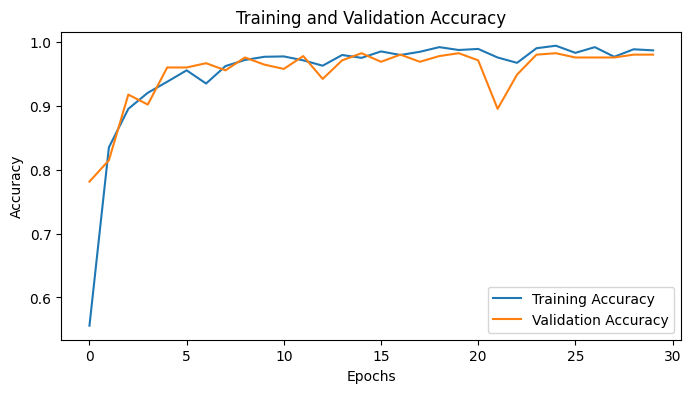

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(history_fine.history['accuracy'], label='Fine-Tuned Training Accuracy')
# plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuned Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

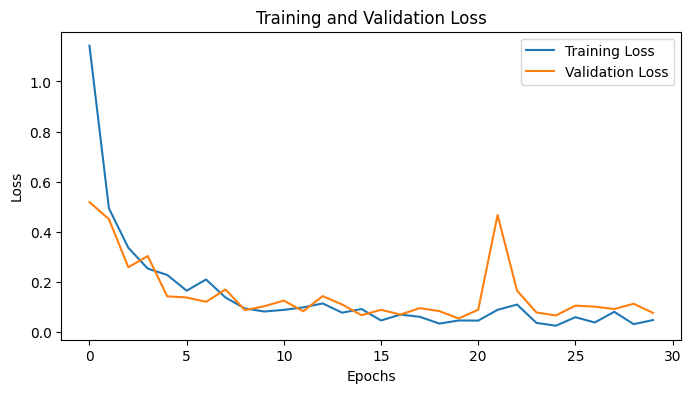

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.plot(history_fine.history['accuracy'], label='Fine-Tuned Training Accuracy')
# plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuned Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Model Prediction

In [38]:
#X_test.shape

X_test.shape
X_train.shape

(2240, 40, 1)

In [39]:
X_test = X_test.reshape(-1, 40, 1)
pred_y = model.predict(X_test)
pred_y.shape

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(560, 7)

In [40]:
pred_y = np.argmax(pred_y, axis = 1)
test_y = np.argmax(y_test, axis = 1)

In [41]:
# Accuracy Score

AS = accuracy_score(pred_y, test_y)

print("Accuracy Score:\n", AS)
print("Accuracy Score as Percentage:\n", AS * 100,"%")

Accuracy Score:
 0.9857142857142858
Accuracy Score as Percentage:
 98.57142857142858 %


In [42]:
# Confusion Matrix

Conf_Matrix = confusion_matrix(pred_y, test_y)


print("Confusion Matrix:\n", Conf_Matrix)

Confusion Matrix:
 [[86  2  0  1  0  0  1]
 [ 0 75  0  1  0  0  0]
 [ 0  0 89  1  0  0  0]
 [ 0  0  0 70  0  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  0  0  0  0 80  0]
 [ 0  2  0  0  0  0 73]]


In [43]:
# Classification Report

Target_Emotions = ['neutral', 'sad', 'happy', 'fear', 'angry', 'surprise', 'disgust']

CR = classification_report(pred_y, test_y, target_names = Target_Emotions)

print("Classification Report:\n", CR)

Classification Report:
               precision    recall  f1-score   support

     neutral       1.00      0.96      0.98        90
         sad       0.95      0.99      0.97        76
       happy       1.00      0.99      0.99        90
        fear       0.96      1.00      0.98        70
       angry       1.00      1.00      1.00        79
    surprise       1.00      1.00      1.00        80
     disgust       0.99      0.97      0.98        75

    accuracy                           0.99       560
   macro avg       0.98      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



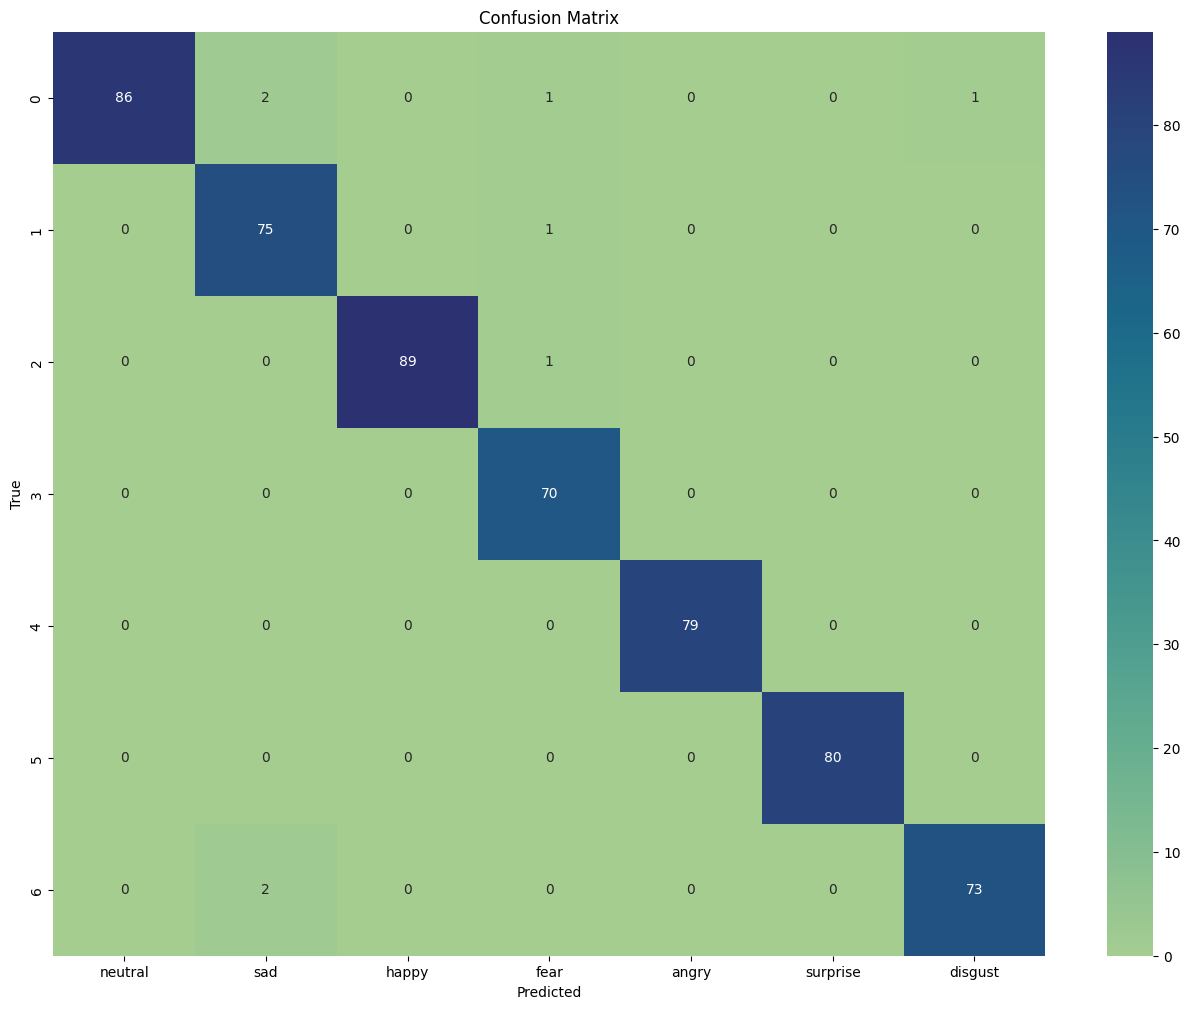

In [46]:
# Correlation HeatMap

plt.figure(figsize = (16, 12))
sns.heatmap(Conf_Matrix, annot = True, fmt = 'd', cmap = 'crest', xticklabels = Target_Emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()